# <u><b> Objective </b></u>
## <b> Your task is to predict whether a message will be spam or not. In the class we used the <code>sklearn.countvectorizer</code> to find vectors for each message. Now you need to do the same task but rather than using countvectorizer, you are required to use TF-IDF vectorizer to find the vectors for the messages. </b>

### You will use <code>tfidfVectorizer</code>. It will convert collection of text documents (SMS corpus) into 2D matrix. One dimension represent documents and other dimension repesents each unique word in SMS corpus.

### If $n^{th}$ term $t$ has occured $p$ times in $m^{th}$ document, $(m, n)$ value in this matrix will be $\rm TF-IDF(t)$, where 
$\rm TF-IDF(t) = \rm Term ~Frequency (TF) * \rm Inverse~ Document ~Frequency (IDF)$
* ### <b>Term Frequency (TF)</b> is a measure of how frequent a term occurs in a document.

* ### $TF(t)$= Number of times term $t$ appears in document ($p$) / Total number of terms in that document

* ### <b>Inverse Document Frequency (IDF)</b> is measure of how important term is. For TF, all terms are equally treated. But, in IDF, for words that occur frequently like 'is' 'the' 'of' are assigned less weight. While terms that occur rarely that can easily help identify class of input features will be weighted high.

* ###  $IDF(t)= log(\frac{\rm Total ~ number ~ of ~document}{ Number ~of~ documents~ with ~term ~t ~in~ it})$

### At end we will have for every message, vectors normalized to unit length equal to size of vocabulary (number of unique terms from entire SMS corpus)





In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading data
# path = 'E:/Data Science/amlabetter/Module 4/Week 3/Day 2/spam.csv'

path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 4/Week 3/Day 2/spam.csv'
message = pd.read_csv(path, encoding='latin-1')[['v1', 'v2']]
message.columns = ['label', 'message']
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory data analysis

In [4]:
message['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

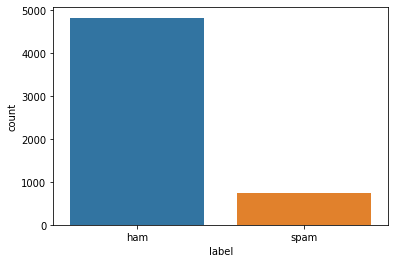

In [5]:
# target visualisation
sns.countplot(x = message['label'])

In [6]:
message.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
message.shape

(5572, 2)

In [9]:
# Stop words
import string
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
# function for deleting punctuations
def delete_punc(msg):
    " takes string and returns string without punctuations "
    non_punc_msg = [m for m in msg if m not in string.punctuation]
    return ''.join(non_punc_msg)

In [12]:
# function for deleting stopwords
def delete_stop_words(msg):
    "takes string and returns string without stopwords"
    non_punc_msg = delete_punc(msg)
    non_stop_words_msg = [nswm for nswm in non_punc_msg.split() if nswm.lower() not in stopwords.words('english')]
    return ' '.join(non_stop_words_msg)

In [13]:
# before applying the above functions
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
message['tokenized'] = message['message'].apply(delete_stop_words)

In [15]:
# after applying the above functions
pd.set_option('display.max_colwidth', -1)
message.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,label,message,tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry questionstd txt rateTCs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah dont think goes usf lives around though


In [16]:
# bag of words steps
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
vectorizer = TfidfVectorizer(max_df=.9, min_df = 10)
X = vectorizer.fit_transform(message['tokenized'])

In [18]:
X.toarray()[4560]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.36644381, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
print(vectorizer.get_feature_names())

['0800', '08000839402', '08000930705', '10', '100', '1000', '10p', '12', '12hrs', '150', '150p', '150pm', '150pmsg', '150ppm', '16', '18', '1st', '200', '2000', '2003', '250', '2nd', '300', '350', '500', '5000', '750', '800', '8007', '86688', '87066', 'abiola', 'able', 'abt', 'account', 'across', 'actually', 'address', 'admirer', 'aft', 'afternoon', 'age', 'ago', 'ah', 'aight', 'almost', 'alone', 'already', 'alright', 'also', 'always', 'amp', 'angry', 'another', 'ans', 'answer', 'anyone', 'anything', 'anytime', 'anyway', 'apply', 'ard', 'area', 'around', 'asap', 'ask', 'askd', 'asked', 'asking', 'ass', 'attempt', 'auction', 'available', 'await', 'award', 'awarded', 'away', 'awesome', 'b4', 'babe', 'baby', 'back', 'bad', 'bank', 'bath', 'bathe', 'bcoz', 'bday', 'beautiful', 'bed', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bonus', 'book', 'booked', 'bored', 'bout', 'box', 'boy', 'boytoy', 'break', 'bring', 'brother', 'bslvyl', 'bt', 'bus', 'busy', 'buy', 'call', 'called', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
X.toarray().shape

(5572, 872)

In [21]:
# splitting data for train and test purpose
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(message['tokenized'],message['label'],random_state=0,test_size=.2)

In [22]:
x_train.head()

1114    nothis kallis home groundamla home town durban                                  
3589    escape theatre Going watch KAVALAN minutes                                      
3095    walked moms Right stagwood pass right winterstone left victors hill Address ltgt
1012    dunno close oredi ÌÏ v fan                                                      
3320    Yo im right yo work                                                             
Name: tokenized, dtype: object

In [23]:
train_vectorized = vectorizer.transform(x_train)
test_vectorized = vectorizer.transform(x_test)

In [24]:
train_vectorized

<4457x872 sparse matrix of type '<class 'numpy.float64'>'
	with 24404 stored elements in Compressed Sparse Row format>

In [25]:
# converting sparsh matrix to array so that it can be fitted
train_array = train_vectorized.toarray()
test_array = test_vectorized.toarray()

In [26]:
# fitting model
from sklearn.naive_bayes import GaussianNB
spam_detect_model = GaussianNB().fit(train_array, y_train)

In [27]:
# making prediction
train_pred = spam_detect_model.predict(train_array)
test_pred = spam_detect_model.predict(test_array)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
# Confusion matrices for train and test 

print(confusion_matrix(y_train,train_pred))
print(confusion_matrix(y_test,test_pred))

[[2993  883]
 [   0  581]]
[[721 228]
 [ 13 153]]


In [30]:
# Print the classification report for train and test
print(classification_report(y_train,train_pred))
print("\n")
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         ham       1.00      0.77      0.87      3876
        spam       0.40      1.00      0.57       581

    accuracy                           0.80      4457
   macro avg       0.70      0.89      0.72      4457
weighted avg       0.92      0.80      0.83      4457



              precision    recall  f1-score   support

         ham       0.98      0.76      0.86       949
        spam       0.40      0.92      0.56       166

    accuracy                           0.78      1115
   macro avg       0.69      0.84      0.71      1115
weighted avg       0.90      0.78      0.81      1115

